# README

Before execute the code above, execute the steps of section "**Accessing Google Drive from Google Colab**". These steps will configure the execution environment in colab, with all requirements necessaries.

# FIRST HERE! Accessing Google Drive from Google Colab

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Install [python 3.8](https://stackoverflow.com/a/71512702/13976785)

## First, run de commands below

In [ ]:
!apt install chromium-chromedriver
#!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.10.3-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py38" --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 22 not upgraded.
Need to get 91.7 MB of archives.
After this operation, 309 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 105.0.5195.102-0ubuntu0.18.04.1 [1,156 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 105.0.5195.102-0ubuntu0.

## Before check the current version, save the file (Ctrl+s) and reload the page (F5) and than check the current version

In [1]:
import sys
print("User Current Version:-", sys.version)

User Current Version:- 3.8.10 (default, Jun  4 2021, 15:09:15) 
[GCC 7.5.0]


# Move to the project directory



> **WARNING: For this step you will need to have downloaded the repository on your google drive. [How to do here](https://colab.research.google.com/drive/156ye97gzuYg4jFlL49495WQy9t-_oJnH?authuser=2#scrollTo=NNQ-wTalk-Fn).** 



In [2]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
!pwd

/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification


## Install requirements

### Instaling project requirements

In [3]:
!pip install -U -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.0 MB/s 
     |████████████████████████████████| 160 kB 7.5 MB/s 
     |████████████████████████████████| 160 kB 67.3 MB/s 
     |████████████████████████████████| 6.6 MB 28.2 MB/s 
     |████████████████████████████████| 1.8 MB 44.7 MB/s 
     |████████████████████████████████| 944 kB 72.7 MB/s 
     |████████████████████████████████| 158 kB 79.2 MB/s 
     |████████████████████████████████| 61 kB 9.7 MB/s 
     |████████████████████████████████| 132 kB 65.6 MB/s 
     |████████████████████████████████| 133 kB 68.2 MB/s 
     |████████████████████████████████| 306 kB 65.3 MB/s 
     |████████████████████████████████| 81 kB 9.7 MB/s 
     |████████████████████████████████| 132 kB 81.4 MB/s 
     |████████████████████████████████| 1.2 MB 55.0 MB/s 
     |████████████████████████████████| 11.3 MB 27.3 MB/s 
     |███████████████████████████████

### Restart [runtime](https://stackoverflow.com/a/53165687/13976785)

In [ ]:
import os
os.kill(os.getpid(), 9)

### Move to the project folder, again

In [1]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
!pwd

/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification


# Library

In [2]:
# utilities
import csv_treatments
import pre_processing
import reports
import pattern_extraction
import utils
import numpy as np
import pandas as pd


# Settings

In [3]:
# Set pandas max rows
pd.set_option('display.max_rows', utils.PANDAS_MAX_ROWS)

# Path to the dataset
csv_path = '/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/base_dados/TAB_MODELAGEM_RAFAEL_2020_1.csv'

# Number of lines to be read from the dataset, where None read all lines
number_csv_lines = None

# Path to save plots
path_save_plots = './plots'

# Dictionay with type of data for each column
dtype_dict = {
    'ID_ANIMAL': 'uint32',
    'EstabelecimentoMunicipio': 'category',
    'Frigorifico_ID': 'uint8',
    'Frigorifico_CNPJ': 'uint64',
    'Frigorifico_RazaoSocial': 'category',
    'Municipio_Frigorifico': 'category',
    'Tipificacao': 'category',
    'Maturidade': 'category',
    'Acabamento': 'category',
    'Peso': 'float32',
    'EstabelecimentoIdentificador': 'uint16',
    'Questionario_ID': 'uint16',
    'QuestionarioClassificacaoEstabel': 'uint8',
    'FERTIIRRIGACAO': 'uint8',
    'ILP': 'uint8',
    'IFP': 'uint8',
    'ILPF': 'uint8',
    'CONCEN_VOLUM': 'UInt8',
    'CREEPFEEDING': 'UInt8',
    'FORN_ESTRAT_SILAGEM': 'UInt8',
    'PROTEICO': 'UInt8',
    'PROTEICO_ENERGETICO': 'UInt8',
    'RACAO_BAL_CONS_INFERIOR': 'UInt8',
    'SAL_MINERAL': 'UInt8',
    'SALMINERAL_UREIA': 'UInt8',
    'RACAOO_BAL_CONSUMO_IG': 'UInt8',
    'GRAO_INTEIRO': 'UInt8',
    'ALTO_CONCENTR_VOLUM': 'UInt8',
    'ALTO_CONCENTRADO': 'UInt8',
    'QuestionarioPossuiOutrosIncentiv': 'uint8',
    'QuestionarioFabricaRacao': 'uint8',
    'area so confinamento': 'UInt8',
    'regua de manejo': 'UInt8',
    'boa cobertura vegetal, com baixa': 'UInt8',
    'erosaoo laminar ou em sulco igua': 'UInt8',
    'identificacao individual': 'UInt8',
    'rastreamento SISBOV': 'UInt8',
    'Lista Trace': 'UInt8',
    'BPA': 'UInt8',
    'participa de aliancas mercadolog': 'UInt8',
    'QuestionarioPraticaRecuperacaoPa': 'uint8',
    'Confinamento': 'UInt8',
    'Suplementacao_a_campo': 'UInt8',
    'SemiConfinamento': 'UInt8',
    'dif_datas': 'uint16',
    'tot7d_Chuva': 'float32',
    'med7d_TempInst': 'float32',
    'med7d_TempMin': 'float32',
    'med7d_UmidInst': 'float32',
    'med7d_formITUinst': 'float32',
    'med7d_formITUmax': 'float32',
    'med7d_NDVI': 'float32',
    'med7d_EVI': 'float32',
    'med7d_preR_soja': 'float32',
    'med7d_preR_milho': 'float32',
    'med7d_preR_boi': 'float32',
    'tot1m_Chuva': 'float32',
    'med1m_TempInst': 'float32',
    'med1m_UmidInst': 'float32',
    'med1m_formITUinst': 'float32',
    'med1m_NDVI': 'float32',
    'med1m_EVI': 'float32',
    'med1m_preR_soja': 'float32',
    'med1m_preR_milho': 'float32',
    'med1m_preR_boi': 'float32',
    'tot3m_Chuva': 'float32',
    'med3m_TempInst': 'float32',
    'med3m_UmidInst': 'float32',
    'med3m_formITUinst': 'float32',
    'med3m_formITUmax': 'float32',
    'med3m_NDVI': 'float32',
    'med3m_EVI': 'float32',
    'med3m_preR_soja': 'float32',
    'med3m_preR_milho': 'float32',
    'med3m_preR_boi': 'float32',
    'tot6m_Chuva': 'float32',
    'med6m_TempInst': 'float32',
    'med6m_UmidInst': 'float32',
    'med6m_formITUinst': 'float32',
    'med6m_NDVI': 'float32',
    'med6m_EVI': 'float32',
    'med6m_preR_soja': 'float32',
    'med6m_preR_milho': 'float32',
    'med6m_preR_boi': 'float32',
    'tot12m_Chuva': 'float32',
    'med12m_TempInst': 'float32',
    'med12m_TempMin': 'float32',
    'med12m_UmidInst': 'float32',
    'med12m_formITUinst': 'float32',
    'med12m_NDVI': 'float32',
    'med12m_EVI': 'float32',
    'med12m_preR_soja': 'float32',
    'med12m_preR_milho': 'float32',
    'med12m_preR_boi': 'float32',
    'cnt7d_CL_ITUinst': 'float32',
    'cnt1m_CL_ITUinst': 'float32',
    'cnt3m_CL_ITUinst': 'float32',
    'cnt6m_CL_ITUinst': 'float32',
    'cnt12m_CL_ITUinst': 'float32',
    'ANO': 'uint16',
    'CATEGORIA': 'category',
    'classificacao': 'category',
    'Motivo': 'category'
}

# List with dates to parse
parse_dates = [
    'DataAbate', 'Data_homol', 'DataAbate_6m_ANT',
    'data_homol_select', 'data12m', 'data6m',
    'data3m', 'data1m', 'data7d'
]

# List with columns to delete when loading dataset
# delete_columns_names_on_load_data = None
delete_columns_names_on_load_data = [
    'Frigorifico_ID', 'Frigorifico_CNPJ', 'Frigorifico_RazaoSocial', 'Municipio_Frigorifico',
    'EstabelecimentoIdentificador', 'Data_homol', 'Questionario_ID',
    'area so confinamento', 'Lista Trace', 'Motivo', 'data_homol_select', 'dif_datas',
    'DataAbate_6m_ANT', 'data12m', 'data6m', 'data3m', 'data1m', 'data7d',
    'tot7d_Chuva', 'med7d_TempInst', 'med7d_TempMin', 'med7d_UmidInst', 'med7d_formITUmax', 'med7d_NDVI', 'med7d_EVI',
    'tot1m_Chuva', 'med1m_TempInst', 'med1m_UmidInst', 'med1m_NDVI', 'med1m_EVI',
    'tot3m_Chuva', 'med3m_TempInst', 'med3m_UmidInst', 'med3m_formITUmax', 'med3m_NDVI', 'med3m_EVI',
    'tot6m_Chuva', 'med6m_TempInst', 'med6m_UmidInst', 'med6m_NDVI', 'med6m_EVI',
    'tot12m_Chuva', 'med12m_TempInst', 'med12m_TempMin', 'med12m_UmidInst', 'med12m_NDVI', 'med12m_EVI',
]

# Dictionary with column names to apply the ordinal encoder
ordinal_encoder_columns_names = {
    'Maturidade': ['d', '2', '4', '6', '8'],
    'Acabamento': [
        'Magra - Gordura Ausente',
        'Gordura Escassa - 1 A 3 Mm De Espessura',
        'Gordura Mediana - Acima De 3 A Até 6 Mm De Espessura',
        'Gordura Uniforme - Acima De 6 E Até 10 Mm De Espessura',
        'Gordura Excessiva - Acima De 10 Mm De Espessura'
    ],
    'QuestionarioClassificacaoEstabel': ['0', '21', '26', '30'],
    'CATEGORIA': ['D', 'C', 'BB', 'BBB', 'AA', 'AAA']
}
# Dictionary with the ordinal encode object fitted for each column
columns_ordinal_encoded = dict()

# Dictionary with column names to apply the label encoder
label_encoder_columns_names = [
    'DataAbate', 'classificacao'
]
# Dictionary with the label encoder object fitted for each column
columns_label_encoded = dict()

# Dictionary with column names to apply the ordinal encoder
one_hot_encoder_columns_names = [
    'EstabelecimentoMunicipio', 'Tipificacao', 'ANO'
]
# Dictionary with the one hot encoder object fitted for each column
columns_one_hot_encoded = dict()

# Dictionary with column names to apply the min max scaler
min_max_scaler_columns_names = [
    'Peso',
    'med7d_formITUinst', 'med7d_preR_soja', 'med7d_preR_milho', 'med7d_preR_boi',
    'med1m_formITUinst', 'med1m_preR_soja', 'med1m_preR_milho', 'med1m_preR_boi',
    'med3m_formITUinst', 'med3m_preR_soja', 'med3m_preR_milho', 'med3m_preR_boi',
    'med6m_formITUinst', 'med6m_preR_soja', 'med6m_preR_milho', 'med6m_preR_boi',
    'med12m_formITUinst', 'med12m_preR_soja', 'med12m_preR_milho', 'med12m_preR_boi'
]
# Dictionary with the min max scaler object fitted for each column
columns_min_max_scaled = dict()

# Class column name
class_column = 'classificacao'


# CSV Treatments

## Dataset

In [4]:
# Load the dataset
precoce_ms_data_frame = csv_treatments.load_data(
    csv_path=csv_path, delete_columns_names=delete_columns_names_on_load_data,
    number_csv_lines=number_csv_lines, dtype_dict=dtype_dict, parse_dates=parse_dates
)


*****INICIO LOAD DATA******

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 3153593
Número de colunas: 112
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153593 entries, 0 to 3153592
Data columns (total 112 columns):
 #    Column                            Dtype         
---   ------                            -----         
 0    ID_ANIMAL                         uint32        
 1    EstabelecimentoMunicipio          category      
 2    DataAbate                         datetime64[ns]
 3    Frigorifico_ID                    uint8         
 4    Frigorifico_CNPJ                  uint64        
 5    Frigorifico_RazaoSocial           category      
 6    Municipio_Frigorifico             category      
 7    Tipificacao                       category      
 8    Maturidade                        category      
 9    Acabamento                        category      
 10   Peso                              float32       
 11   Estabelecim

# Reports

## All attributes

In [ ]:
# Print a report of all attributes
reports.all_attributes(data_frame=precoce_ms_data_frame)



*****INICIO RELATÓRIO ATRIBUTOS******
Número de atributos: 65
Nome dos atributos: ['ID_ANIMAL', 'EstabelecimentoMunicipio', 'DataAbate', 'Tipificacao', 'Maturidade', 'Acabamento', 'Peso', 'QuestionarioClassificacaoEstabel', 'FERTIIRRIGACAO', 'ILP', 'IFP', 'ILPF', 'CONCEN_VOLUM', 'CREEPFEEDING', 'FORN_ESTRAT_SILAGEM', 'PROTEICO', 'PROTEICO_ENERGETICO', 'RACAO_BAL_CONS_INFERIOR', 'SAL_MINERAL', 'SALMINERAL_UREIA', 'RACAOO_BAL_CONSUMO_IG', 'GRAO_INTEIRO', 'ALTO_CONCENTR_VOLUM', 'ALTO_CONCENTRADO', 'QuestionarioPossuiOutrosIncentiv', 'QuestionarioFabricaRacao', 'regua de manejo', 'boa cobertura vegetal, com baixa', 'erosaoo laminar ou em sulco igua', 'identificacao individual', 'rastreamento SISBOV', 'BPA', 'participa de aliancas mercadolog', 'QuestionarioPraticaRecuperacaoPa', 'Confinamento', 'Suplementacao_a_campo', 'SemiConfinamento', 'med7d_formITUinst', 'med7d_preR_soja', 'med7d_preR_milho', 'med7d_preR_boi', 'med1m_formITUinst', 'med1m_preR_soja', 'med1m_preR_milho', 'med1m_preR_boi

/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:128: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Descrição:\n{}'.format(column_data.describe()))


Descrição:
count                 3153593
unique                   1122
top       2020-12-16 00:00:00
freq                     7545
first     2017-02-09 00:00:00
last      2020-12-31 00:00:00
Name: DataAbate, dtype: object
Número de nan: 0
-------------------------------
-> Atributo: Tipificacao
Contagem de valor:
Macho Inteiro     1455364
Fêmea             1009359
Macho Castrado     688870
Name: Tipificacao, dtype: int64
Descrição:
count           3153593
unique                3
top       Macho Inteiro
freq            1455364
Name: Tipificacao, dtype: object
Número de nan: 0
-------------------------------
-> Atributo: Maturidade
Contagem de valor:
2    1281432
d    1043535
4     598320
6     155983
8      74323
Name: Maturidade, dtype: int64
Descrição:
count     3153593
unique          5
top             2
freq      1281432
Name: Maturidade, dtype: object
Número de nan: 0
-------------------------------
-> Atributo: Acabamento
Contagem de valor:
Gordura Mediana - Acima De 3 A Até 6 Mm 

## Delete duplicate rows by attribute, and print the report

In [5]:
# Delete the duplicated rows by attribute, and print the report
precoce_ms_data_frame = pre_processing.delete_duplicate_rows_by_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='ID_ANIMAL', print_report=True)

precoce_ms_data_frame = utils.delete_columns(
    data_frame=precoce_ms_data_frame, delete_columns_names=['ID_ANIMAL'])



*****INICIO DELETE DUPLICATE ROWS BY ATTRIBUTE******
Linhas duplicadas encontradas para o atributo ID_ANIMAL.

*****INICIO RELATÓRIO LINHAS DUPLICADAS******
Data Frame do Atríbuto ID_ANIMAL com as linhas duplicadas:



,ID_ANIMAL,EstabelecimentoMunicipio,DataAbate,Tipificacao,Maturidade,Acabamento,Peso,QuestionarioClassificacaoEstabel,FERTIIRRIGACAO,ILP,IFP,ILPF,CONCEN_VOLUM,CREEPFEEDING,FORN_ESTRAT_SILAGEM,PROTEICO,PROTEICO_ENERGETICO,RACAO_BAL_CONS_INFERIOR,SAL_MINERAL,SALMINERAL_UREIA,RACAOO_BAL_CONSUMO_IG,GRAO_INTEIRO,ALTO_CONCENTR_VOLUM,ALTO_CONCENTRADO,QuestionarioPossuiOutrosIncentiv,QuestionarioFabricaRacao,regua de manejo,"boa cobertura vegetal, com baixa",erosaoo laminar ou em sulco igua,identificacao individual,rastreamento SISBOV,BPA,participa de aliancas mercadolog,QuestionarioPraticaRecuperacaoPa,Confinamento,Suplementacao_a_campo,SemiConfinamento,med7d_formITUinst,med7d_preR_soja,med7d_preR_milho,med7d_preR_boi,med1m_formITUinst,med1m_preR_soja,med1m_preR_milho,med1m_preR_boi,med3m_formITUinst,med3m_preR_soja,med3m_preR_milho,med3m_preR_boi,med6m_formITUinst,med6m_preR_soja,med6m_preR_milho,med6m_preR_boi,med12m_formITUinst,med12m_preR_soja,med12m_preR_milho,med12m_preR_boi,cnt7d_CL_ITUinst,cnt1m_CL_ITUinst,cnt3m_CL_ITUinst,cnt6m_CL_ITUinst,cnt12m_CL_ITUinst,ANO,CATEGORIA,classificacao
2361947,3326125,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,365.000000,26,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,66.220001,114.830002,50.439999,198.619995,68.269997,107.870003,49.369999,199.339996,71.360001,99.349998,54.020000,199.839996,72.769997,93.650002,51.669998,201.919998,71.269997,88.860001,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361946,3326125,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,365.000000,26,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,1,66.220001,114.830002,50.439999,198.619995,68.269997,107.870003,49.369999,199.339996,71.360001,99.349998,54.020000,199.839996,72.769997,93.650002,51.669998,201.919998,71.269997,88.860001,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361949,3326126,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,336.399994,26,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,1,66.220001,114.830002,50.439999,198.619995,68.269997,107.870003,49.369999,199.339996,71.360001,99.349998,54.020000,199.839996,72.769997,93.650002,51.669998,201.919998,71.269997,88.860001,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361957,3326126,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,336.399994,26,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,66.220001,114.830002,50.439999,198.619995,68.269997,107.870003,49.369999,199.339996,71.360001,99.349998,54.020000,199.839996,72.769997,93.650002,51.669998,201.919998,71.269997,88.860001,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361945,3326127,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,313.399994,26,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,66.220001,114.830002,50.439999,198.619995,68.269997,107.870003,49.369999,199.339996,71.360001,99.349998,54.020000,199.839996,72.769997,93.650002,51.669998,201.919998,71.269997,88.860001,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361955,3326127,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,313.399994,26,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,1,66.220001,114.830002,50.439999,198.619995,68.269997,107.870003,49.369999,199.339996,71.360001,99.349998,54.020000,199.839996,72.769997,93.650002,51.669998,201.919998,71.269997,88.860001,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361956,3326128,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Magra - Gordura Ausente,335.000000,26,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,66.220001,114.830002,50.439999,198.619995,68.269997,107.870003,49.369999,199.339996,71.360001,99.349998,54.020000,199.839996,72.769997,93.650002,51.669998,20

Relatório dos atributos que divergem, entre os registros que tem o atributo ID_ANIMAL igual.
ID_ANIMAL:3326125
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361946    1
2361947    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326126
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361949    1
2361957    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326127
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361945    0
2361955    1
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326128
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361956    0
2361959    1
Name: identificacao individual, dtype: 

## NaN attributes

In [6]:
# Delete NaN rows
precoce_ms_data_frame = pre_processing.delete_nan_rows(
    data_frame=precoce_ms_data_frame, print_report=True)

reports.informations(data_frame=precoce_ms_data_frame)



*****INICIO DELETE NAN ROWS******
Linhas com valores NaN encontradas.

*****INICIO RELATÓRIO ATRIBUTOS NAN******
Total de Ocorrencia de NaN no DataFrame: 1243483
Linhas com valores NaN:         EstabelecimentoMunicipio  DataAbate  ... CATEGORIA classificacao
2046                 SIDROLANDIA 2017-03-22  ...        BB           SIM
2047                 SIDROLANDIA 2017-03-22  ...        BB           SIM
2048                 SIDROLANDIA 2017-03-22  ...       AAA           SIM
2049                 SIDROLANDIA 2017-03-22  ...        BB           SIM
2050                 SIDROLANDIA 2017-03-22  ...        AA           SIM
...                          ...        ...  ...       ...           ...
3153193                   TACURU 2020-12-31  ...        BB           SIM
3153194                   TACURU 2020-12-31  ...        BB           SIM
3153195                   TACURU 2020-12-31  ...       AAA           SIM
3153196                   TACURU 2020-12-31  ...        AA           SIM
3153197   

,Coluna,total_NaN,Porcentagem
0,"boa cobertura vegetal, com baixa",610286,19.352582
0,erosaoo laminar ou em sulco igua,610286,19.352582
0,rastreamento SISBOV,920,0.029174
0,med7d_preR_soja,527,0.016712
0,med1m_preR_soja,527,0.016712
0,med1m_preR_milho,527,0.016712
0,med1m_preR_boi,527,0.016712
0,med3m_formITUinst,527,0.016712
0,med3m_preR_soja,527,0.016712
0,med3m_preR_milho,527,0.016712


*****FIM RELATÓRIO ATRIBUTOS NAN******
*****FIM DELETE NAN ROWS*********

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 2543061
Número de colunas: 64
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543061 entries, 0 to 3153592
Data columns (total 64 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   EstabelecimentoMunicipio          category      
 1   DataAbate                         datetime64[ns]
 2   Tipificacao                       category      
 3   Maturidade                        category      
 4   Acabamento                        category      
 5   Peso                              float32       
 6   QuestionarioClassificacaoEstabel  uint8         
 7   FERTIIRRIGACAO                    uint8         
 8   ILP                               uint8         
 9   IFP                               uint8         
 10  ILPF                              uin

## Convert pandas dtypes to numpy dtypes

In [7]:
# Convert pandas dtypes to numpy dtypes, some operations doesn't work with pandas dtype, for exemple, the XGBoost models
precoce_ms_data_frame = utils.convert_pandas_dtype_to_numpy_dtype(
    data_frame=precoce_ms_data_frame, pandas_dtypes=[pd.UInt8Dtype()])


## Unique values

In [ ]:
# Print the unique values for each column
reports.unique_values_for_each_column(
    data_frame=precoce_ms_data_frame
)


*****INICIO IMPRIMIR UNIQUE VALUES FOR EACH COLUMN******


EstabelecimentoMunicipio              75
DataAbate                           1116
Tipificacao                            3
Maturidade                             5
Acabamento                             5
Peso                                3777
QuestionarioClassificacaoEstabel       4
FERTIIRRIGACAO                         2
ILP                                    2
IFP                                    2
ILPF                                   2
CONCEN_VOLUM                           2
CREEPFEEDING                           2
FORN_ESTRAT_SILAGEM                    2
PROTEICO                               2
PROTEICO_ENERGETICO                    2
RACAO_BAL_CONS_INFERIOR                2
SAL_MINERAL                            2
SALMINERAL_UREIA                       2
RACAOO_BAL_CONSUMO_IG                  2
GRAO_INTEIRO                           2
ALTO_CONCENTR_VOLUM                    2
ALTO_CONCENTRADO                       2
QuestionarioPossuiOutrosIncentiv       2
QuestionarioFabr

*****FIM IMPRIMIR UNIQUE VALUES FOR EACH COLUMN******


In [ ]:
precoce_ms_data_frame[class_column].value_counts()

SIM    2126831
NÃO     416230
Name: classificacao, dtype: int64

In [ ]:
for column in precoce_ms_data_frame.columns:
  try:
    print('Coluna: {} Variancia: {}'.format(column, precoce_ms_data_frame[column].var()))
  except:
    pass

Coluna: Peso Variancia: 2281.347412109375
Coluna: QuestionarioClassificacaoEstabel Variancia: 12.946052487378761
Coluna: FERTIIRRIGACAO Variancia: 0.10573559312948166
Coluna: ILP Variancia: 0.24880338434832885
Coluna: IFP Variancia: 0.047298579335953224
Coluna: ILPF Variancia: 0.044062929816520595
Coluna: CONCEN_VOLUM Variancia: 0.1612079400541439
Coluna: CREEPFEEDING Variancia: 0.07672995767413188
Coluna: FORN_ESTRAT_SILAGEM Variancia: 0.07372127177574284
Coluna: PROTEICO Variancia: 0.2471633409504197
Coluna: PROTEICO_ENERGETICO Variancia: 0.23749502498807268
Coluna: RACAO_BAL_CONS_INFERIOR Variancia: 0.1621871420678325
Coluna: SAL_MINERAL Variancia: 0.24575562148869354
Coluna: SALMINERAL_UREIA Variancia: 0.12863501294027577
Coluna: RACAOO_BAL_CONSUMO_IG Variancia: 0.24976344225656
Coluna: GRAO_INTEIRO Variancia: 0.06201280277637232
Coluna: ALTO_CONCENTR_VOLUM Variancia: 0.20185113694023707
Coluna: ALTO_CONCENTRADO Variancia: 0.011757463396811633
Coluna: QuestionarioPossuiOutrosIncent

## Percentage of unique values

In [ ]:
# Print the percentage of unique values for each column
reports.percentage_unique_values_for_each_column(
    data_frame=precoce_ms_data_frame, threshold=1
)


*****INICIO IMPRIMIR PERCENTAGE UNIQUE VALUES FOR EACH COLUMN******


,Coluna,total_Unique,Porcentagem
0,regua de manejo,1,0.000039
0,participa de aliancas mercadolog,2,0.000079
0,GRAO_INTEIRO,2,0.000079
0,ALTO_CONCENTR_VOLUM,2,0.000079
0,ALTO_CONCENTRADO,2,0.000079
0,QuestionarioPossuiOutrosIncentiv,2,0.000079
0,QuestionarioFabricaRacao,2,0.000079
0,"boa cobertura vegetal, com baixa",2,0.000079
0,erosaoo laminar ou em sulco igua,2,0.000079
0,identificacao individual,2,0.000079


*****FIM IMPRIMIR PERCENTAGE UNIQUE VALUES FOR EACH COLUMN******


## Delete columns with single value

In [8]:
# Identify columns that contain a single value, and delete them
precoce_ms_data_frame = pre_processing.delete_columns_with_single_value(
    data_frame=precoce_ms_data_frame
)



*****INICIO DELETE COLUMNS WITH SINGLE VALUE******
>>> Colunas removidas com valor único: ['regua de manejo']
*****FIM DELETE COLUMNS WITH SINGLE VALUE*********


## Attributes that have a low variance


*****INICIO IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******
Shape do X antes: (2543061, 62).
X shape (Dados originais): (2543061, 62)
*****INICIO DELETE COLUNAS******
Coluna Peso excluída.
Coluna QuestionarioClassificacaoEstabel excluída.
Coluna FERTIIRRIGACAO excluída.
Coluna ILP excluída.
Coluna IFP excluída.
Coluna ILPF excluída.
Coluna CONCEN_VOLUM excluída.
Coluna CREEPFEEDING excluída.
Coluna FORN_ESTRAT_SILAGEM excluída.
Coluna PROTEICO excluída.
Coluna PROTEICO_ENERGETICO excluída.
Coluna RACAO_BAL_CONS_INFERIOR excluída.
Coluna SAL_MINERAL excluída.
Coluna SALMINERAL_UREIA excluída.
Coluna RACAOO_BAL_CONSUMO_IG excluída.
Coluna GRAO_INTEIRO excluída.
Coluna ALTO_CONCENTR_VOLUM excluída.
Coluna ALTO_CONCENTRADO excluída.
Coluna QuestionarioPossuiOutrosIncentiv excluída.
Coluna QuestionarioFabricaRacao excluída.
Coluna boa cobertura vegetal, com baixa excluída.
Coluna erosaoo laminar ou em sulco igua excluída.
Coluna identificacao individual excluída.
Coluna rastreamen

tcmalloc: large alloc 1139294208 bytes == 0x560760f0a000 @  0x7f1284b7b1e7 0x7f127e7a4064 0x7f127e7a47ff 0x7f127e802f55 0x7f127e8a6969 0x7f127e8a70b7 0x7f127e8a720c 0x56069be5ecbf 0x7f127e7ebeb4 0x56069bf7f8cf 0x56069bf40da8 0x56069bf9b673 0x56069bf6d132 0x56069bf6d7fb 0x56069bf1b149 0x56069bf6d768 0x56069bf41ede 0x7f127e7ebeb4 0x56069bf7f8cf 0x56069bf40da8 0x56069bf9b673 0x56069bf6d132 0x56069bf6d7fb 0x56069bf1b149 0x56069bf6d066 0x56069bf6d85f 0x56069bf1acc7 0x56069bf6d768 0x56069bf1ae14 0x56069bf6d768 0x56069bf1b254


*****INICIO DELETE COLUNAS******
*****FIM DELETE COLUNAS*********
>>> Threshold: 0.00
Número de colunas depois da remoção: 56
*****FIM DELETE COLUMNS WITH LOW VARIANCE*********

*****INICIO DELETE COLUMNS WITH LOW VARIANCE******
>>> Número de colunas antes da remoção: 56
*****INICIO DELETE COLUNAS******
Coluna QuestionarioPossuiOutrosIncentiv excluída.
Coluna ILPF excluída.
Coluna ALTO_CONCENTRADO excluída.
Coluna BPA excluída.
Coluna IFP excluída.
Coluna cnt7d_CL_ITUinst excluída.
Coluna cnt1m_CL_ITUinst excluída.
Coluna cnt12m_CL_ITUinst excluída.
Coluna boa cobertura vegetal, com baixa excluída.
Coluna cnt3m_CL_ITUinst excluída.
Coluna erosaoo laminar ou em sulco igua excluída.
Coluna cnt6m_CL_ITUinst excluída.
*****FIM DELETE COLUNAS*********
>>> Threshold: 0.05
Número de colunas depois da remoção: 44
*****FIM DELETE COLUMNS WITH LOW VARIANCE*********

Shape do X depois: (2543061, 50).
Figure plot-simulate-delete-columns-with-low-variance-08-10-2022_20:10:42.png saved in ./plots/ d

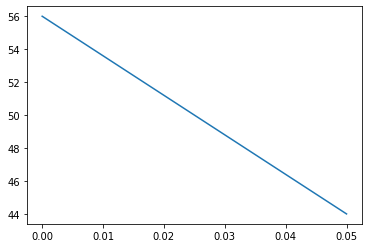


*****FIM IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******


In [ ]:
# Simulate delete columns with low variance, using VarianceThreshold from sklearn
reports.simulate_delete_columns_with_low_variance(
    data_frame=precoce_ms_data_frame,
    thresholds=np.arange(0.0, 0.10, 0.05),
    separate_numeric_columns=True,
    path_save_fig=path_save_plots,
    display_figure=True
)


## Apply encoders and move target to last position in dataframe

In [9]:
# Apply ordinal encoder to the columns
precoce_ms_data_frame, columns_ordinal_encoded = pre_processing.ordinal_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_ordinal_encoded=columns_ordinal_encoded, columns_names=ordinal_encoder_columns_names)



*****INICIO ORDINAL ENCODER******
*****FIM ORDINAL ENCODER*********


In [10]:
# Apply label encoder to the columns
precoce_ms_data_frame, columns_label_encoded = pre_processing.label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=columns_label_encoded, columns_names=label_encoder_columns_names)



*****INICIO LABEL ENCODER******
*****FIM LABEL ENCODER*********


In [11]:
# Apply one hot encoder to the columns
precoce_ms_data_frame, columns_one_hot_encoded = pre_processing.one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=columns_one_hot_encoded, columns_names=one_hot_encoder_columns_names)



*****INICIO ONE-HOT ENCODER******


tcmalloc: large alloc 1525841920 bytes == 0x556e9cb08000 @  0x7f5fcd823001 0x7f5fc7449fae 0x7f5fc744a88e 0x7f5fc74a8d17 0x7f5fc74aa86a 0x7f5fc7548b9b 0x556e079c6753 0x556e0799ccc7 0x556e079fa376 0x556e0799d149 0x556e079ef066 0x556e079fa4c6 0x556e0799d149 0x556e079ef768 0x556e0799d254 0x556e079ee9c9 0x556e079fa4c6 0x556e0799d149 0x556e079ef132 0x556e079ef85f 0x556e0799d254 0x556e079ef066 0x556e079ef85f 0x556e0799ccc7 0x556e079ee9c9 0x556e07a38e8f 0x556e079c661d 0x556e0799ce14 0x556e079d9d84 0x556e0799cfab 0x556e079d9d84


*****INICIO DELETE COLUNAS******
Coluna EstabelecimentoMunicipio excluída.
*****FIM DELETE COLUNAS*********
*****INICIO DELETE COLUNAS******
Coluna Tipificacao excluída.
*****FIM DELETE COLUNAS*********
*****INICIO DELETE COLUNAS******
Coluna ANO excluída.
*****FIM DELETE COLUNAS*********
*****FIM ONE-HOT ENCODER*********


In [12]:
# Apply min max scaler to the columns
precoce_ms_data_frame, columns_min_max_scaled = pre_processing.min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=columns_min_max_scaled, columns_names=min_max_scaler_columns_names)



*****INICIO MIN-MAX SCALER******
*****FIM MIN-MAX SCALER*********


In [13]:
# Move the target column to the last position in dataframe
precoce_ms_data_frame = utils.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=[class_column])


## Target attribute distribution

In [ ]:
# Target attribute distribution
reports.class_distribution(
    y=precoce_ms_data_frame[class_column].values)


*****INICIO RELATÓRIO DISTRIBUIÇÃO DE CLASSES******
Distribuição da classe 1: 84%
Distribuição da classe 0: 16%
Erro majoritário: 16%
*****FIM RELATÓRIO DISTRIBUIÇÃO DE CLASSES******


## Correlation matrix

In [14]:
# Correlation matrix using pearson method, between all attributes
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='pearson',
    display_matrix=True, export_matrix=True, path_save_matrix=path_save_plots)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
# Correlation matrix using pearson method, between all attributes and the class attribute
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='pearson', attribute=class_column,
    display_matrix=True, export_matrix=True, path_save_matrix=path_save_plots)


*****INICIO CORRELATION MATRIX******


tcmalloc: large alloc 2888925184 bytes == 0x556f9dbf4000 @  0x7f5fcd8211e7 0x7f5fc744a064 0x7f5fc744a7ff 0x7f5fc74a8f55 0x7f5fc74aa92b 0x7f5fc75489eb 0x556e079c6753 0x556e0799ccc7 0x556e079ef066 0x556e079fa4c6 0x556e0799ccc7 0x556e079ef066 0x556e079fa4c6 0x556e0799ccc7 0x556e079ef066 0x556e079fa4c6 0x556e0799ccc7 0x556e079ef066 0x556e079fa4c6 0x556e0799ccc7 0x556e079ef066 0x556e079ef85f 0x556e0799ccc7 0x556e079ee9c9 0x556e07a38e8f 0x556e079c661d 0x556e0799ce14 0x556e079d9d84 0x556e0799cfab 0x556e079d9d84 0x556e0799cfab


,classificacao
DataAbate,-0.005240
Maturidade,-0.611037
Acabamento,0.123250
Peso,-0.025954
QuestionarioClassificacaoEstabel,0.094529
FERTIIRRIGACAO,0.002542
ILP,0.019753
IFP,0.015127
ILPF,0.029876
CONCEN_VOLUM,0.028167


[1018/004135.238298:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1018/004135.238446:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1018/004135.242583:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1018/004135.291035:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1018/004135.491571:INFO:headless_shell.cc(660)] Written to file /tmp/tmpqfn8gtni/temp.png.
[1018/004135.792097:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1018/004135.792822:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1018/004135.796386:WARNING:bluez_dbus_manag

Figure correlation_matrix-pearson-classificacao-18-10-2022_00:41:35.png saved in ./plots/ directory.
*****FIM CORRELATION MATRIX*********


In [16]:
# Correlation matrix using spearman method, between all attributes
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='spearman',
    display_matrix=True, export_matrix=True, path_save_matrix=path_save_plots)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# Correlation matrix using spearman method, between all attributes and the class attribute
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='spearman', attribute=class_column,
    display_matrix=True, export_matrix=True, path_save_matrix=path_save_plots)


*****INICIO CORRELATION MATRIX******


tcmalloc: large alloc 2888925184 bytes == 0x556f9dbf4000 @  0x7f5fcd8211e7 0x7f5fc744a064 0x7f5fc744a7ff 0x7f5fc74a8f55 0x7f5fc74aa92b 0x7f5fc75489eb 0x556e079c6753 0x556e0799ccc7 0x556e079ef066 0x556e079fa4c6 0x556e0799ccc7 0x556e079ef066 0x556e079fa4c6 0x556e0799ccc7 0x556e079ef066 0x556e079fa4c6 0x556e0799ccc7 0x556e079ef066 0x556e079fa4c6 0x556e0799ccc7 0x556e079ef066 0x556e079ef85f 0x556e0799ccc7 0x556e079ee9c9 0x556e07a38e8f 0x556e079c661d 0x556e0799ce14 0x556e079d9d84 0x556e0799cfab 0x556e079d9d84 0x556e0799cfab
tcmalloc: large alloc 2888925184 bytes == 0x557049f0c000 @  0x7f5fcd8211e7 0x7f5fc744a064 0x7f5fc744a7ff 0x7f5fc74a8f55 0x7f5fc74aa92b 0x7f5fc75489eb 0x556e079c6753 0x556e079c3ede 0x7f5fc1299ce9 0x7f5fc13680c8 0x556e07a01834 0x556e079c2da8 0x556e07a1eea6 0x556e079ef066 0x556e079fa4c6 0x556e0799ccc7 0x556e079ef066 0x556e079ef85f 0x556e0799ccc7 0x556e079ee9c9 0x556e07a38e8f 0x556e079c661d 0x556e0799ce14 0x556e079d9d84 0x556e0799cfab 0x556e079d9d84 0x556e0799cfab 0x556e079d

,classificacao
DataAbate,-0.005292
Maturidade,-0.515991
Acabamento,0.113986
Peso,-0.036223
QuestionarioClassificacaoEstabel,0.095070
FERTIIRRIGACAO,0.002542
ILP,0.019753
IFP,0.015127
ILPF,0.029876
CONCEN_VOLUM,0.028167


[1018/010202.785766:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1018/010202.787023:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1018/010202.790300:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1018/010202.876505:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1018/010203.093247:INFO:headless_shell.cc(660)] Written to file /tmp/tmpmq07dfrx/temp.png.
[1018/010203.404831:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1018/010203.404966:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1018/010203.409167:WARNING:bluez_dbus_manag

Figure correlation_matrix-spearman-classificacao-18-10-2022_01:02:02.png saved in ./plots/ directory.
*****FIM CORRELATION MATRIX*********


## Calcule feature importance with linear models


*****INICIO IMPRIMIR FEATURE IMPORTANCE USING COEFFICIENTS OF LINEAR MODELS******


tcmalloc: large alloc 1912389632 bytes == 0x55a943546000 @  0x7f1f4c5ba1e7 0x7f1f461e3064 0x7f1f461e37ff 0x7f1f46241f55 0x7f1f46244b91 0x7f1f462d7d07 0x55a89354b753 0x55a893521cc7 0x55a893574066 0x55a89357485f 0x55a893521cc7 0x55a893574066 0x55a89357485f 0x55a893521cc7 0x55a893574066 0x55a89357485f 0x55a893521cc7 0x55a893574066 0x55a89357485f 0x55a893521cc7 0x55a893574066 0x55a89357485f 0x55a89357f549 0x55a893548ede 0x55a8935a7120 0x55a893574132 0x55a89357f4c6 0x55a893521cc7 0x55a893574066 0x55a89357f4c6 0x55a893521cc7
tcmalloc: large alloc 2868576256 bytes == 0x55a9e29f6000 @  0x7f1f4c5ba1e7 0x7f1f461e3064 0x7f1f461e37ff 0x7f1f46241f55 0x7f1f462e5969 0x7f1f462e60b7 0x7f1f462e620c 0x55a893465cbf 0x7f1f4622aeb4 0x55a8935868cf 0x55a893547da8 0x55a8935a2673 0x55a893574132 0x55a8935747fb 0x55a893522149 0x55a893574768 0x55a893548ede 0x7f1f4622aeb4 0x55a8935868cf 0x55a893547da8 0x55a8935a2673 0x55a893574132 0x55a8935747fb 0x55a893522149 0x55a893574066 0x55a89357485f 0x55a893521cc7 0x55a89357



Model: LogisticRegression()

Feature importance using coefficients of linear models:


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Importance
58,CATEGORIA,5.180374
135,Tipificacao_Macho Castrado,1.106890
134,Tipificacao_Fêmea,0.500776
11,FORN_ESTRAT_SILAGEM,0.183859
127,EstabelecimentoMunicipio_SIDROLANDIA,0.151084
84,EstabelecimentoMunicipio_CORUMBA,0.147070
1,Maturidade,0.140000
10,CREEPFEEDING,0.112189
18,GRAO_INTEIRO,0.111535
55,cnt3m_CL_ITUinst,0.099915


Figure bar-feature_importance_using_coefficients_of_linear_models-LogisticRegression()-08-10-2022_22:16:21.png saved in ./plots/ directory.


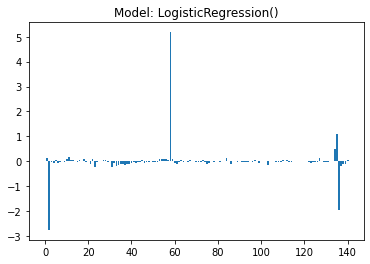

tcmalloc: large alloc 2868576256 bytes == 0x55a9e29f6000 @  0x7f1f4c5ba1e7 0x7f1f461e3064 0x7f1f461e37ff 0x7f1f46241f55 0x7f1f462e5969 0x7f1f462e60b7 0x7f1f462e620c 0x55a893465cbf 0x7f1f4622aeb4 0x55a8935868cf 0x55a893547da8 0x55a8935a2673 0x55a893574132 0x55a8935747fb 0x55a893522149 0x55a893574768 0x55a893548ede 0x7f1f4622aeb4 0x55a8935868cf 0x55a893547da8 0x55a8935a2673 0x55a893574132 0x55a8935747fb 0x55a893522149 0x55a893574066 0x55a89357485f 0x55a893521cc7 0x55a893574768 0x55a893521e14 0x55a893574768 0x55a893522254
tcmalloc: large alloc 2868576256 bytes == 0x55aa8d9a6000 @  0x7f1f4c5ba1e7 0x7f1f461e3064 0x7f1f461e37ff 0x7f1f46241f55 0x7f1f462420b6 0x7f1f462d476a 0x7f1f462d51cb 0x55a89357f9c0 0x55a8935a3245 0x55a893574066 0x55a89357485f 0x55a893521cc7 0x55a893574768 0x55a893521e14 0x55a893574768 0x55a893522254 0x55a893574768 0x55a893522254 0x55a893574132 0x55a8935747fb 0x55a893521e14 0x55a89357f376 0x55a893522149 0x55a893574132 0x55a89357f45b 0x55a893522149 0x55a893574768 0x55a89355



Model: LinearSVC()

Feature importance using coefficients of linear models:


/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Feature,Importance
3,Peso,1.195407
58,CATEGORIA,1.058432
50,med12m_preR_soja,0.430119
47,med6m_preR_milho,0.424880
48,med6m_preR_boi,0.318196
135,Tipificacao_Macho Castrado,0.247136
42,med3m_preR_soja,0.236553
65,EstabelecimentoMunicipio_ANTONIO JOAO,0.143201
87,EstabelecimentoMunicipio_DEODAPOLIS,0.132078
41,med3m_formITUinst,0.131835


Figure bar-feature_importance_using_coefficients_of_linear_models-LinearSVC()-08-10-2022_22:41:35.png saved in ./plots/ directory.


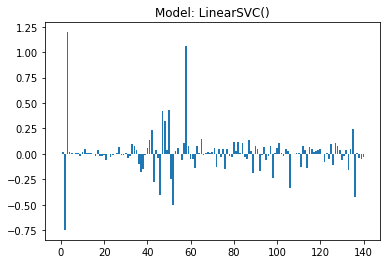

tcmalloc: large alloc 2868576256 bytes == 0x55a9e29f6000 @  0x7f1f4c5ba1e7 0x7f1f461e3064 0x7f1f461e37ff 0x7f1f46241f55 0x7f1f462e5969 0x7f1f462e60b7 0x7f1f462e620c 0x55a893465cbf 0x7f1f4622aeb4 0x55a8935868cf 0x55a893547da8 0x55a8935a2673 0x55a893574132 0x55a8935747fb 0x55a893522149 0x55a893574768 0x55a893548ede 0x7f1f4622aeb4 0x55a8935868cf 0x55a893547da8 0x55a8935a2673 0x55a893574132 0x55a8935747fb 0x55a893522149 0x55a893574066 0x55a89357485f 0x55a893521cc7 0x55a893574768 0x55a893521e14 0x55a893574768 0x55a893522254




Model: SGDClassifier()

Feature importance using coefficients of linear models:


,Feature,Importance
58,CATEGORIA,13.247036
135,Tipificacao_Macho Castrado,8.136735
23,"boa cobertura vegetal, com baixa",7.932153
134,Tipificacao_Fêmea,6.934217
137,ANO_2017,5.507669
45,med6m_formITUinst,5.361915
138,ANO_2018,4.865440
139,ANO_2019,4.461059
33,med7d_formITUinst,3.613668
1,Maturidade,3.015274


Figure bar-feature_importance_using_coefficients_of_linear_models-SGDClassifier()-08-10-2022_22:42:42.png saved in ./plots/ directory.


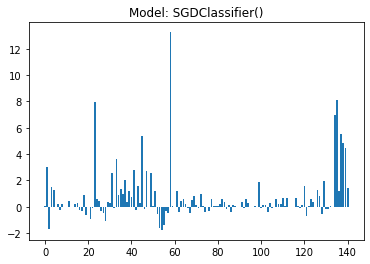

*****FIM IMPRIMIR FEATURE IMPORTANCE USING COEFFICIENTS OF LINEAR MODELS******


In [ ]:
# Calculate feature importance with linear models
reports.feature_importance_using_coefficients_of_linear_models(
    data_frame=precoce_ms_data_frame,
    models=['logistic_regression', 'linear_svc', 'sgd_classifier'],
    path_save_fig=path_save_plots,
    display_figure=True
)


## Calcule feature importance with tree based models


*****INICIO IMPRIMIR FEATURE IMPORTANCE USING TREE BASED MODELS******


tcmalloc: large alloc 1434288128 bytes == 0x5649f906c000 @  0x7f1a01dad1e7 0x7f19fb9d6064 0x7f19fb9d67ff 0x7f19fba34f55 0x7f19fba3692b 0x7f19fbad49eb 0x56495856d753 0x564958543cc7 0x564958596066 0x5649585a14c6 0x564958543cc7 0x564958596066 0x56495859685f 0x564958544254 0x564958596768 0x56495857e223 0x56495856c3f3 0x564958580a11 0x5649585c4999 0x564958596768 0x56495857e223 0x56495856c3f3 0x564958580a11 0x5649585c4999 0x5649585959c9 0x56495859685f 0x5649585a1549 0x564958486daf 0x56495856a499 0x7f19fba33c57 0x7f19fba3650e




Model: DecisionTreeClassifier()

Feature importance using tree based models:


,Feature,Importance
58,CATEGORIA,0.988490
3,Peso,0.008453
1,Maturidade,0.000333
2,Acabamento,0.000253
41,med3m_formITUinst,0.000122
33,med7d_formITUinst,0.000108
35,med7d_preR_milho,0.000103
37,med1m_formITUinst,0.000101
49,med12m_formITUinst,0.000095
34,med7d_preR_soja,0.000090


Figure bar-feature_importance_using_tree_based_models-DecisionTreeClassifier-10-10-2022_20:27:29.png saved in ./plots/ directory.


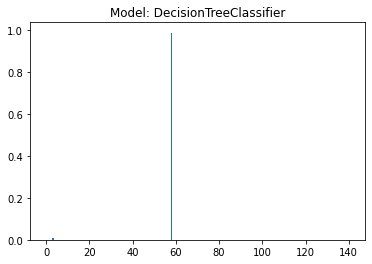

tcmalloc: large alloc 1434288128 bytes == 0x5649f906c000 @  0x7f1a01dad1e7 0x7f19fb9d6064 0x7f19fb9d67ff 0x7f19fba34f55 0x7f19fba3692b 0x7f19fbad49eb 0x56495856d753 0x564958543cc7 0x564958596066 0x5649585a14c6 0x564958543cc7 0x564958596066 0x56495859685f 0x564958544254 0x564958596768 0x56495857e223 0x56495856c3f3 0x564958580a11 0x5649585c4999 0x564958596768 0x56495857e223 0x56495856c3f3 0x564958580a11 0x5649585c4999 0x5649585959c9 0x56495859685f 0x5649585a1549 0x564958486daf 0x56495856a499 0x7f19fba33c57 0x7f19fba3650e




Model: RandomForestClassifier()

Feature importance using tree based models:


,Feature,Importance
58,CATEGORIA,0.563196
1,Maturidade,0.274645
3,Peso,0.073827
136,Tipificacao_Macho Inteiro,0.015703
2,Acabamento,0.014947
135,Tipificacao_Macho Castrado,0.007919
134,Tipificacao_Fêmea,0.006828
4,QuestionarioClassificacaoEstabel,0.001739
30,Confinamento,0.001595
49,med12m_formITUinst,0.001496


Figure bar-feature_importance_using_tree_based_models-RandomForestClassifier-10-10-2022_20:37:04.png saved in ./plots/ directory.


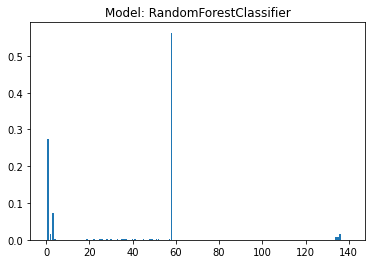

tcmalloc: large alloc 2868576256 bytes == 0x564aa8fa8000 @  0x7f1a01daf887 0x7f19cffcf482 0x7f19cffcfa13 0x7f19cffd4c77 0x7f19d0005eea 0x7f19cffc5575 0x7f19cff0f4f3 0x7f1a000439dd 0x7f1a00043067 0x7f1a0005df96 0x7f1a0005e90c 0x564958569da8 0x5649585c86f8 0x564958596768 0x564958543e14 0x564958596768 0x564958543e14 0x564958596066 0x56495859685f 0x564958543cc7 0x564958596381 0x56495859685f 0x56495856aede 0x5649585c9120 0x564958596132 0x56495859685f 0x564958581242 0x564958582fef 0x5649585a0dea 0x56495856b061 0x5649585c9120
tcmalloc: large alloc 2868576256 bytes == 0x5649f906c000 @  0x7f1a01daf887 0x7f19cffcf482 0x7f19cffcfdd0 0x7f19cffba18a 0x7f19cfff754b 0x7f19d01700ab 0x7f19d017b93b 0x7f19d002dc80 0x7f19d002e857 0x7f19d006ab72 0x7f19cff04098 0x7f1a000439dd 0x7f1a00043067 0x7f1a0005df96 0x7f1a0005e90c 0x564958569da8 0x5649585c86f8 0x5649585959c9 0x56495859685f 0x564958544254 0x564958596381 0x56495859685f 0x56495856aede 0x5649585c9120 0x564958596132 0x56495859685f 0x564958543cc7 0x56495859



Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Feature importance using tree based models:


,Feature,Importance
58,CATEGORIA,0.962019
24,erosaoo laminar ou em sulco igua,0.001545
19,ALTO_CONCENTR_VOLUM,0.000964
65,EstabelecimentoMunicipio_ANTONIO JOAO,0.000902
78,EstabelecimentoMunicipio_CAMPO GRANDE,0.000834
109,EstabelecimentoMunicipio_NOVA ALVORADA DO SUL,0.000831
72,EstabelecimentoMunicipio_BELA VISTA,0.000767
5,FERTIIRRIGACAO,0.000681
16,SALMINERAL_UREIA,0.000627
63,EstabelecimentoMunicipio_ANAURILANDIA,0.000588


Figure bar-feature_importance_using_tree_based_models-XGBClassifier-10-10-2022_21:01:31.png saved in ./plots/ directory.


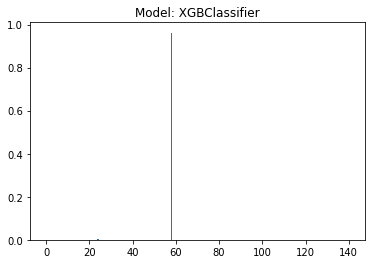

*****FIM IMPRIMIR FEATURE IMPORTANCE USING TREE BASED MODELS******


In [ ]:
# Calculate feature importance with tree based models
reports.feature_importance_using_tree_based_models(
    data_frame=precoce_ms_data_frame,
    models=['decision_tree_classifier',
            'random_forest_classifier', 'xgb_classifier'],
    path_save_fig=path_save_plots,
    display_figure=True
)


## Calcule feature importance using permutation importance

In [ ]:
# Calculate feature importance using permutation importance
reports.feature_importance_using_permutation_importance(
    data_frame=precoce_ms_data_frame,
    models=['knneighbors_classifier', 'gaussian_nb'],
    path_save_fig=path_save_plots,
    display_figure=True
)



*****INICIO IMPRIMIR FEATURE IMPORTANCE USING PERMUTATION IMPORTANCE******


tcmalloc: large alloc 1434288128 bytes == 0x5604567da000 @  0x7f0ad35841e7 0x7f0acd1ad064 0x7f0acd1ad7ff 0x7f0acd20bf55 0x7f0acd20d92b 0x7f0acd2ab9eb 0x5603aeba2753 0x5603aeb78cc7 0x5603aebcb066 0x5603aebd64c6 0x5603aeb78cc7 0x5603aebcb066 0x5603aebcb85f 0x5603aeb79254 0x5603aebcb768 0x5603aebb3223 0x5603aeba13f3 0x5603aebb5a11 0x5603aebf9999 0x5603aebcb768 0x5603aebb3223 0x5603aeba13f3 0x5603aebb5a11 0x5603aebf9999 0x5603aebcb066 0x5603aebcb85f 0x5603aebd661c 0x5603aeb9f139 0x5603aeb9f499 0x7f0acd20ad0c 0x7f0acd20d50e
tcmalloc: large alloc 1434288128 bytes == 0x5605004c8000 @  0x7f0ad35841e7 0x7f0acd1ad064 0x7f0acd1ad7ff 0x7f0acd20bf55 0x7f0acd20eb91 0x7f0acd20edf2 0x7f0acd20f504 0x7f0acd20f677 0x7f0acd2ae787 0x5603aeba2753 0x5603aeb78cc7 0x5603aebcb381 0x5603aebcb85f 0x5603aeb78cc7 0x5603aebcb381 0x5603aebcb85f 0x5603aeb9fede 0x5603aebfe120 0x5603aebcb066 0x5603aebd64c6 0x5603aeb78cc7 0x5603aebca9c9 0x5603aebcb85f 0x5603aeb79254 0x5603aebcb768 0x5603aeb79254 0x5603aebcb066 0x5603aebc